In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical # Import from tensorflow.keras.utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/linear/A_Z Handwritten Data.csv')

In [ ]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Columns: 785 entries, 0 to 0.648
dtypes: float64(317), int64(468)
memory usage: 13.4 MB


In [ ]:
data.shape

(2235, 785)

In [ ]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,2235.0,2235.0,2235.0,2235.0,2235.0,2235.0,2235.0,2235.0,2235.0,2235.0,...,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.0,2234.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024620,0.001343,0.042972,0.102954,0.109669,0.087287,0.022829,0.000448,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.163647,0.063472,2.031092,4.824011,4.976349,4.104544,1.079018,0.021157,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.000000,3.000000,96.000000,228.000000,235.000000,194.000000,51.000000,1.000000,0.0,0.0


In [9]:
data.isnull().sum() #from below result it is clear that there are no null values

,0
0,0
0.1,0
0.2,0
0.3,0
0.4,0
...,...
0.644,1
0.645,1
0.646,1
0.647,1


In [10]:
my_data = data.values
my_data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., nan, nan, nan]])

In [12]:
#Splitting x and y column from dataset
X = my_data[:,1:]
y = my_data[:,0]
print(X.shape)
print(y.shape)

(2235, 784)
(2235,)


In [13]:
#Split into train and validation set
#X_train.shape (297960, 784)
#(X_test.shape 74490, 784)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#reshaping to 28*28 pixels from 784
X_train = np.reshape(X_train,(X_train.shape[0],28,28))
X_test = np.reshape(X_test,(X_test.shape[0],28,28))
print(X_train.shape)
print(X_test.shape)

(1788, 28, 28)
(447, 28, 28)


In [14]:
print(y_train.shape)
print(y_test.shape)

(1788,)
(447,)


In [15]:
print(y_train.shape)
print(y_test.shape)

(1788,)
(447,)


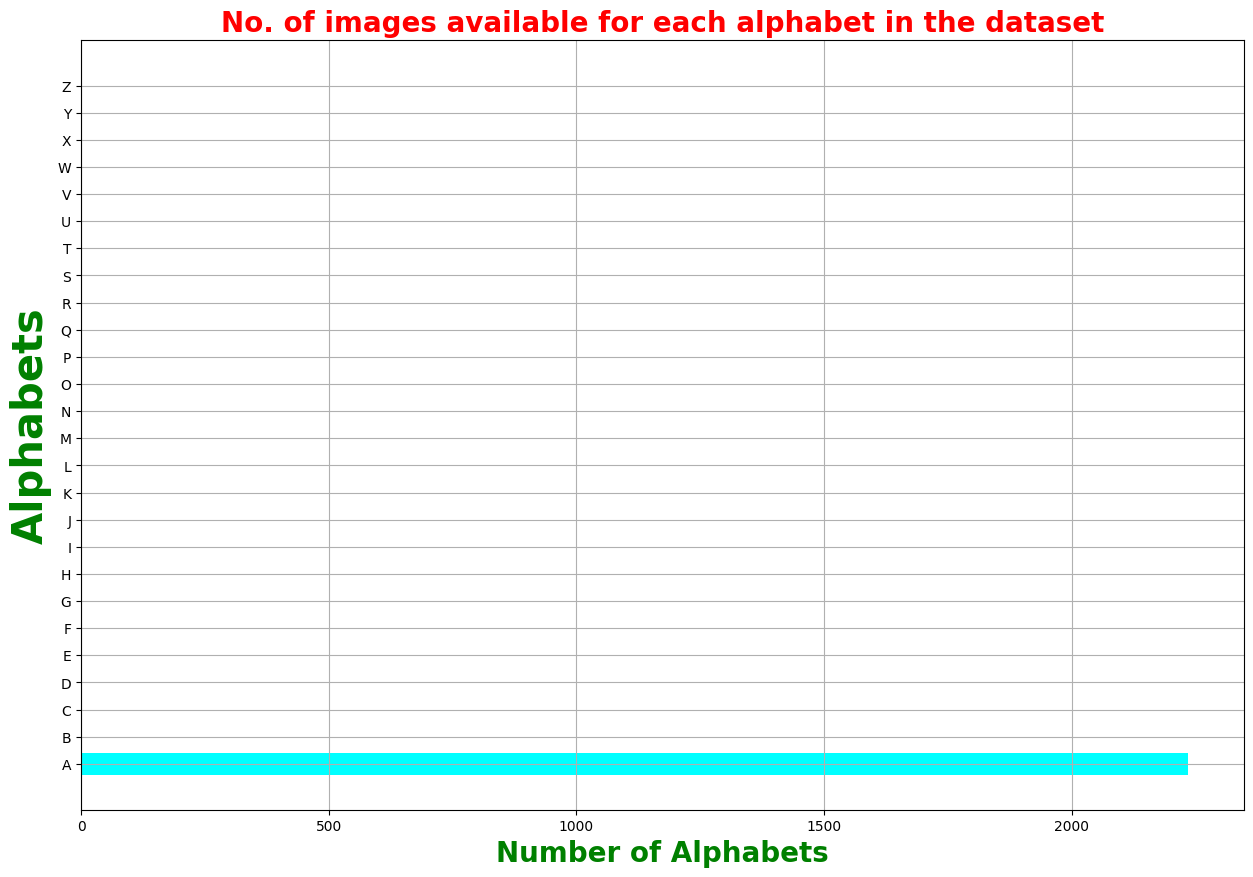

In [23]:
#Plotting number of images for each alphabet from Dataset
# Plotting the number of alphabets in the dataset
# 1): Firstly we create a count list of 26 entries of zeroes and then count each label in y and append them in the count list
# 2): Now we create a list – alphabets containing all the characters
# 3): After that using the count & alphabets lists we draw the horizontal bar plot.

count = np.zeros(26, dtype = 'int') #count list containing all zeroes

#counting each label
# Convert the elements of y to integers before using them as indices
for i in y.astype(int):
    count[i] += 1
# count = array([13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,  1120,
#        8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812, 11566,
#      48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

#creating a list of alphabets
alphabets = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
plt.figure(figsize=(15,10))
plt.barh(alphabets, count, color = "cyan")
plt.xlabel("Number of Alphabets",fontsize = 20, fontweight = 'bold',color = 'green')
plt.ylabel("Alphabets",fontsize = 30, fontweight = 'bold',color = 'green')
plt.title("No. of images available for each alphabet in the dataset", fontsize = 20, fontweight = 'bold', color = "red")
plt.grid()
plt.show()



In [34]:
# CNN Model Architecture
model = Sequential()

#First Conv1D layer
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2))

#Second Conv1D layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Third Conv1D layer
model.add(Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Flatten layer
model.add(Flatten())

#Dense layer 1
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

#Dense layer 2
model.add(Dense(64,activation = 'relu'))

#Final layer of 26 nodes
model.add(Dense(26,activation = 'softmax'))

#Define the loss function to be categorical cross-entropy since it is a multi-classification problem:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Assuming you want to one-hot encode your target variable 'y'
!pip install tensorflow
from tensorflow.keras.utils import to_categorical

# Ensure correct one-hot encoding, explicitly specifying number of classes
categorical_ytrain = to_categorical(y_train, num_classes=26)
categorical_ytest = to_categorical(y_test, num_classes=26)

# Early stopping and model checkpoints
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001)
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Training the model
history = model.fit(x = X_train, y = categorical_ytrain, epochs = 100, callbacks=[es,mc], validation_data = (X_test,categorical_ytest))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9119 - loss: nan
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to best_model.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9131 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: nan
Epoch 2: val_accuracy did not improve from 1.00000
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 3/100
55/56 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: nan
Epoch 3: val_accuracy did not improve from 1.00000
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 4/100
55/56 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: nan
Epoch 4: val_accuracy did not improve from 1.00000
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val

In [35]:
model.summary()
Model: "sequential"

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,848 (1.93 MB)

 Trainable params: 168,282 (657.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 336,566 (1.28 MB)

The validation accuracy is : 1.0
The training accuracy is : 1.0
The validation loss is : nan
The training loss is : nan


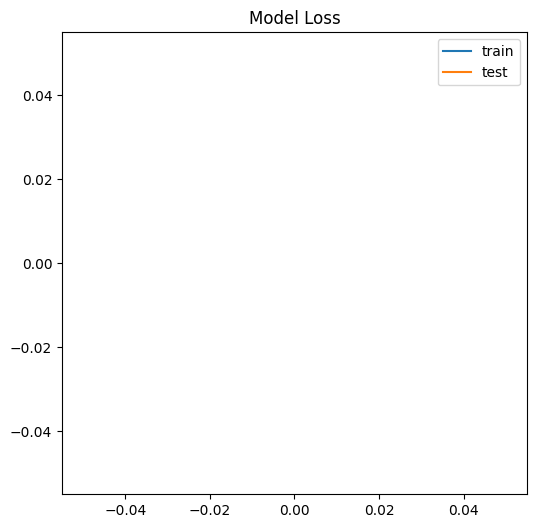

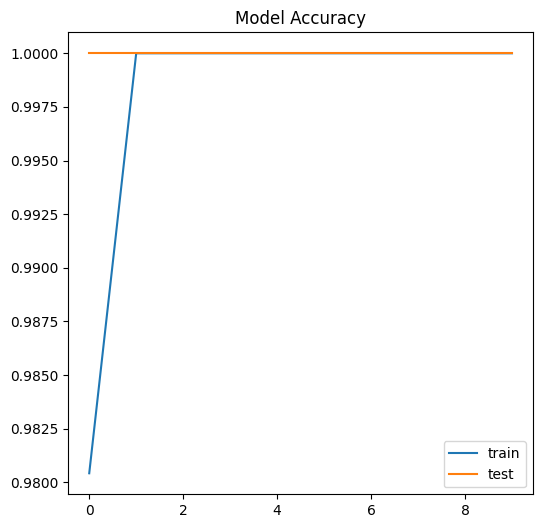

In [36]:
#Find accuracy, losses of Model
print("The validation accuracy is :", history.history['val_accuracy'][-1])
print("The training accuracy is :", history.history['accuracy'][-1])
print("The validation loss is :", history.history['val_loss'][-1])
print("The training loss is :", history.history['loss'][-1])

#Plotting the Model loss and Accuracy on the line graph
plt.figure(figsize = (6,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Model Loss")
plt.show()

plt.figure(figsize = (6,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title("Model Accuracy")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


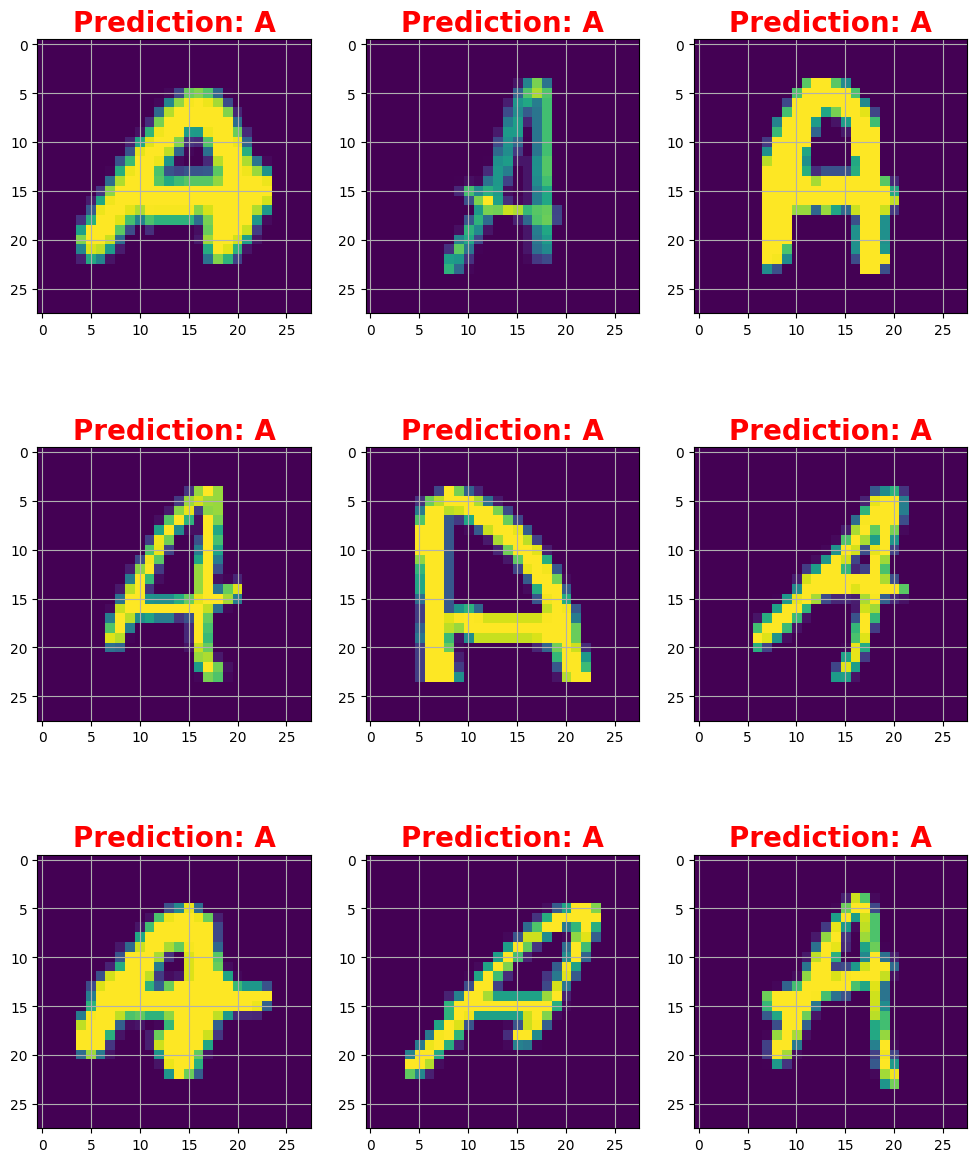

In [37]:
#Making prediction of test data
# Here we are creating 9 subplots of (3,3) shape & visualize some of the test dataset alphabets along with their predictions,
# that are made using the model.predict() function for text recognition.

#creating a dictionary of letters with index
dict_word = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

img_list_test = shuffle(X_test[:1000])
fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i in range(9):
    img = np.reshape(X_test[i], (28, 28))
    axes[i].imshow(img_list_test[i])

    pred = dict_word[np.argmax(model.predict(np.reshape(img_list_test[i],(1,28,28,1))))]
    axes[i].set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'red')
    axes[i].grid()